In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('spam_ham_dataset_class.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


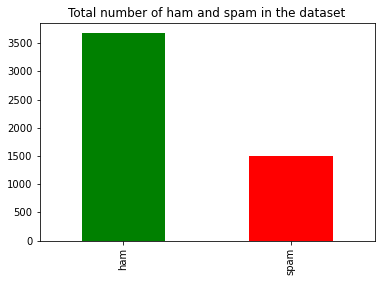

In [3]:
df['label'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [6]:
X=df["text"].to_numpy().tolist()
y=df["label_num"].to_numpy().tolist()
# Crea un objeto CountVectorizer para convertir el texto en una matriz de características
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [7]:
# Hacer Split del dataset para train y test 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Creamos un array de modelos
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB (Bayes)": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(solver='lbfgs', max_iter=1000), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(max_iter=10000), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}
#Entrenamos los modelos y medimos los tiempos
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    #print(f"{name:20} trained in {duration} sec")
    
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])
#Se ordenan los valores del array creado arriba y se muestra en forma de tabla
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,MultinomialNB (Bayes),0.976812,0.00
1,Logistic Regr.,0.973913,0.81
2,Random Forest,0.970048,4.45
3,SVM (Linear),0.964251,0.63
4,Decision Tree,0.957488,0.65
5,SVM (RBF),0.956522,4.07
6,KNN,0.856039,0.00


In [8]:
# Crea un objeto de Naive Bayes
clf = MultinomialNB()

# Utiliza la función cross_val_score para evaluar el modelo con validación cruzada
scores = cross_val_score(clf, X, y, cv=15)

# Imprime los resultados de la validación cruzada
print("Precisión del modelo en cada iteración:", scores)
print("Precisión promedio del modelo:", scores.mean())


Precisión del modelo en cada iteración: [0.97681159 0.97391304 0.97681159 0.97391304 0.97971014 0.97971014
 0.97971014 0.96811594 0.9826087  0.9884058  0.97681159 0.98546512
 0.98255814 0.98546512 0.99127907]
Precisión promedio del modelo: 0.9800859453993933


In [9]:
data = df.drop(['Unnamed: 0', 'label'], axis=1)
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


Text(0.5, 1.0, 'Spam Word Cloud')

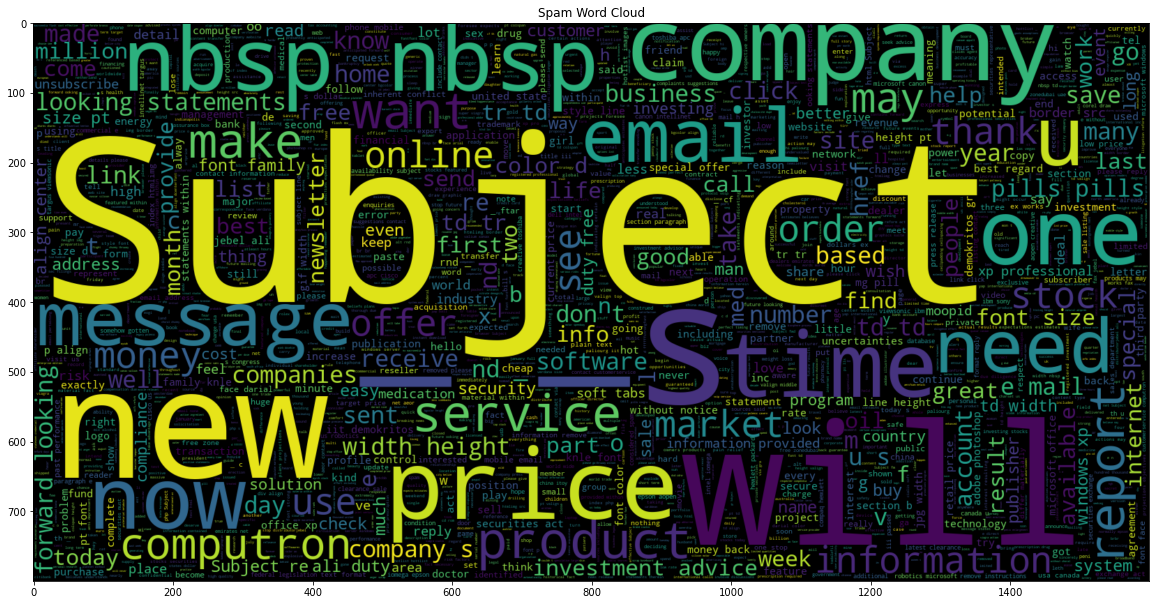

In [10]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label_num == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

Text(0.5, 1.0, 'Ham Word Cloud')

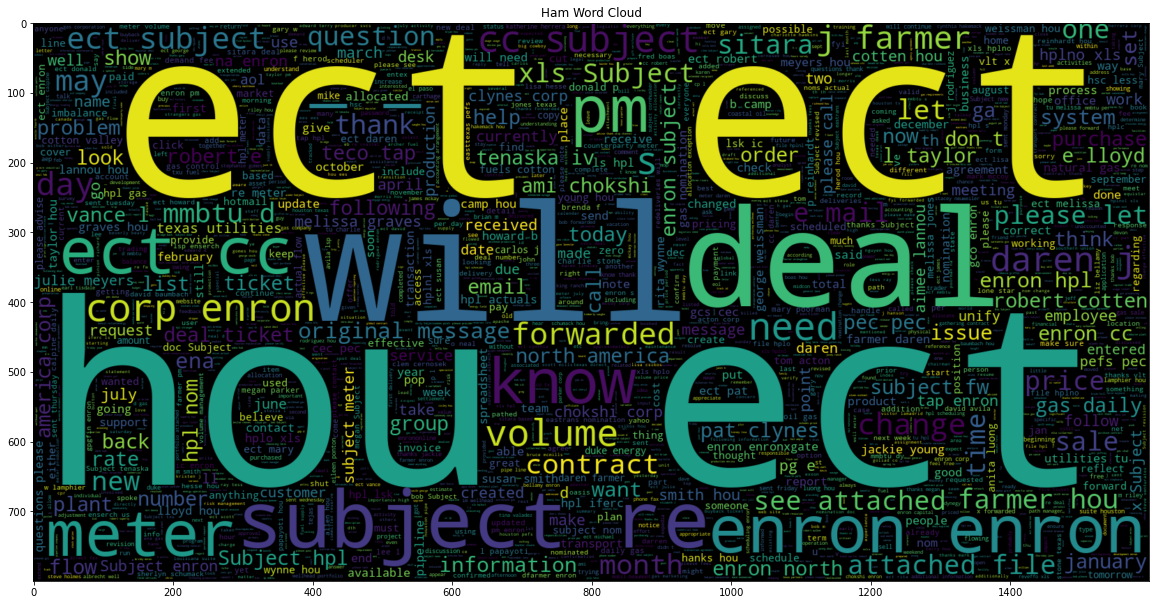

In [11]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label_num == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")